In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

pd.set_option("display.max_columns", None)

PATH = "C:/Users/jackl/OneDrive/Documents/finance_research/japan_qe/"

#### MarketWatch 3month data turned out not to have negative signs fuck that; used Fred 10 year data instead. 

In [80]:
df = pd.read_csv(PATH+'raw_data/bloomberg/jgb_3m_2009.csv', parse_dates=['Date'])
df['Close'] = df['Close'].apply(lambda x: float(x[:-1]))
df_copy = df[['Date', 'Close']]
df_copy['Close'] = ((df['Close']/100 + 1) ** (1/4) - 1) * 100

<ipython-input-80-97127c5a53ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['Close'] = ((df['Close']/100 + 1) ** (1/4) - 1) * 100


In [114]:
names = ['jgb_3m_'+str(i) for i in range(2010, 2021)]
df_list = [df_copy]
df_list = []
for name in names:
    df = pd.read_csv(PATH+'raw_data/bloomberg/' + name + '.csv', parse_dates=['Date'])
#     df = df[['Date', 'Close']]
#     df['Close'] = df['Close'].apply(lambda x: float(x[:-1]))
    df_list.append(df)

In [116]:
df_list[6]

,Date,Open,High,Low,Close
0,2016-12-30,0.41%,0.39%,0.41%,0.39%
1,2016-12-29,0.43%,0.40%,0.43%,0.40%
2,2016-12-28,0.44%,0.42%,0.44%,0.43%
3,2016-12-27,0.44%,0.44%,0.45%,0.44%
4,2016-12-26,0.44%,0.44%,0.45%,0.45%
...,...,...,...,...,...
251,2016-01-06,0.03%,0.03%,0.03%,0.03%
252,2016-01-05,0.03%,0.03%,0.04%,0.03%
253,2016-01-04,0.04%,0.03%,0.04%,0.04%
254,2015-12-31,0.04%,0.04%,0.04%,0.04%


In [110]:
df_full = pd.concat(df_list)
df_full['rfr'] = (df_full['Close'] / 100 + 1) ** (1/63) - 1
df_full = df_full.drop(columns=['Close'])

In [111]:
df_full.columns = ['date', 'rfr']

In [112]:
df_full = df_full.drop_duplicates(['date'], keep='last').sort_values(['date']).reset_index(drop=True)

In [94]:
df_full.to_pickle(PATH+'checkpoint_data/jgb_1m.pkl')

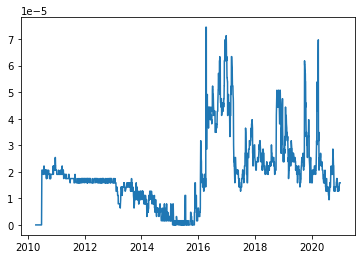

In [113]:
plt.plot(df_full.set_index('date'))

## FRED Cleaning

In [149]:
df = pd.read_csv(PATH+'raw_data/bloomberg/fred_10yr_bond.csv')

In [150]:
df.columns = ['date', 'rfr']
df['date'] = pd.to_datetime(df['date'])

In [151]:
df['rfr'] = ((df['rfr']/100 + 1) ** (1/(10 * 245)) - 1) 

In [155]:
df.to_pickle(PATH+'checkpoint_data/jgb_1d.pkl')